In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic


In [2]:
directory = 'C:/Users/a86963/Documents/data/sentinel-2/testing/new_transect/'

In [3]:
# high chl is 07.10.2020 data, low is 06.07.2020

In [4]:
for file_name in os.listdir(directory):
    file_path = os.path.join(directory, file_name)
    print(file_path)

C:/Users/a86963/Documents/data/sentinel-2/testing/new_transect/06072020_nn_new_transect.txt
C:/Users/a86963/Documents/data/sentinel-2/testing/new_transect/06072020_oc4me_new_transect.txt
C:/Users/a86963/Documents/data/sentinel-2/testing/new_transect/07102020_nn_new_transect.txt
C:/Users/a86963/Documents/data/sentinel-2/testing/new_transect/07102020_oc4me_new_transect.txt


In [5]:

ds_3A_NN = pd.read_csv(f"{directory}07102020_nn_new_transect.txt", sep="\t") # indicates the delimiter
ds_3B_NN = pd.read_csv(f"{directory}06072020_nn_new_transect.txt", sep="\t") 
ds_3A_OC = pd.read_csv(f"{directory}07102020_oc4me_new_transect.txt", sep="\t")
ds_3B_OC = pd.read_csv(f"{directory}06072020_oc4me_new_transect.txt", sep="\t")

# when using the file exported from SNAP, need to remve the top 3 lines (try also exporting without a header!) to make the table come up properly. otherwise doesnt recognise the actual headers.

In [6]:
jul_6_chl_insitu = 1.1 #mg/L
oct_7_chl_insitu = 5.0 #mg/L
insitu_lat = 37.03305556
insitu_lon = -8.87194444
shoreline_lat = 37.028918 # djust checked this in SNAP
shoreline_lon = -8.894512

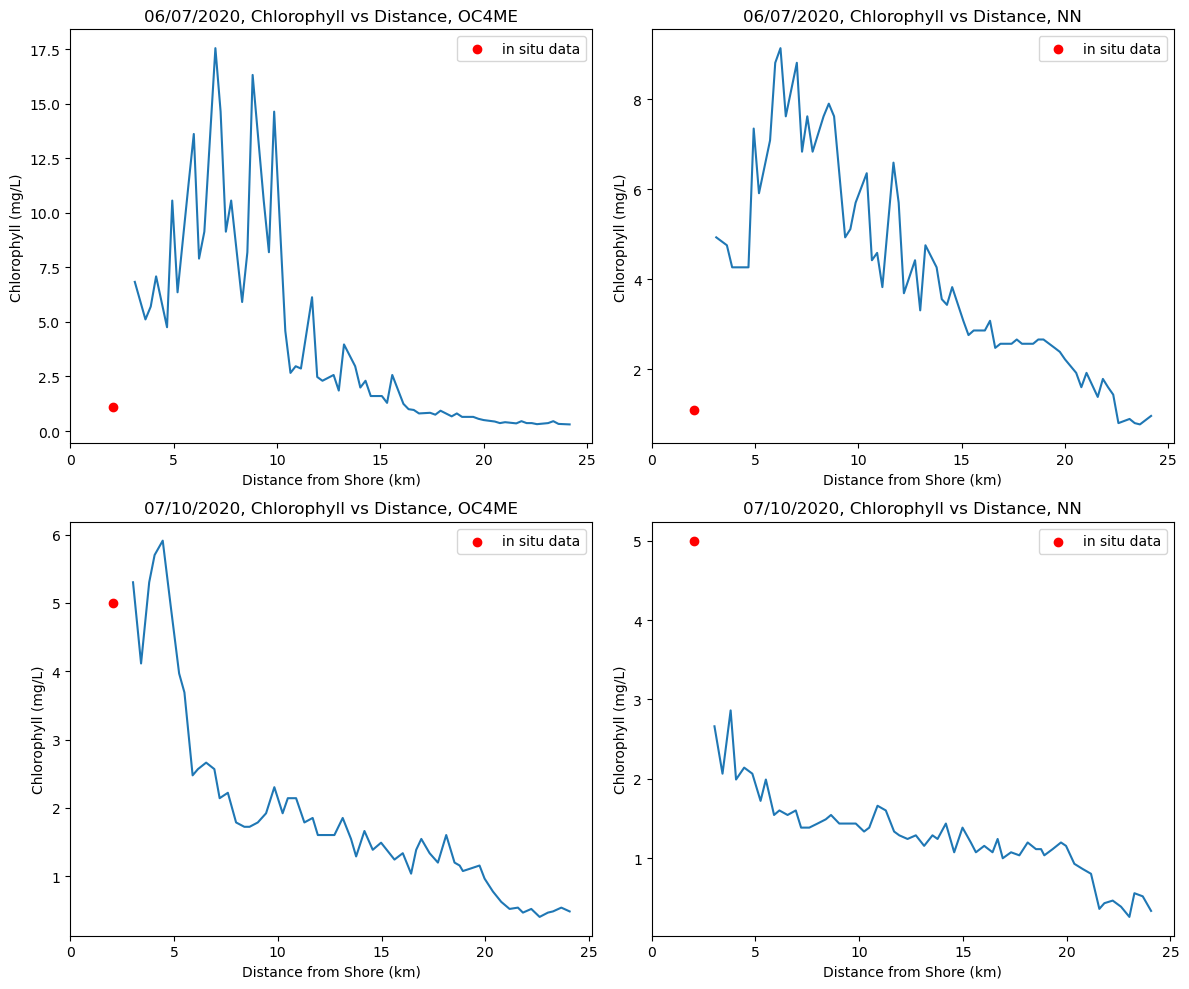

In [9]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for ds_3B_OC
distances_from_shoreline = [
    geodesic(shoreline_coords, (lat, lon)).kilometers 
    for lat, lon in zip(ds_3B_OC['latitude'], ds_3B_OC['longitude'])
]

axs[0, 0].plot(distances_from_shoreline, ds_3B_OC['CHL_OC4ME'])
insitu_distance = geodesic((shoreline_lat, shoreline_lon), (insitu_lat, insitu_lon)).kilometers
axs[0, 0].scatter(insitu_distance, jul_6_chl_insitu, color='r', label='in situ data')
axs[0, 0].set_xlim(0) # so axis starts from 0
axs[0, 0].set_xlabel('Distance from Shore (km)')
axs[0, 0].set_ylabel('Chlorophyll (mg/L)')
axs[0, 0].set_title('06/07/2020, Chlorophyll vs Distance, OC4ME')
axs[0, 0].legend()

# Plot for ds_3B_NN
distances_from_shoreline = [
    geodesic(shoreline_coords, (lat, lon)).kilometers 
    for lat, lon in zip(ds_3B_NN['latitude'], ds_3B_NN['longitude'])
]

axs[0, 1].plot(distances_from_shoreline, ds_3B_NN['CHL_NN'])
insitu_distance = geodesic((shoreline_lat, shoreline_lon), (insitu_lat, insitu_lon)).kilometers
axs[0, 1].scatter(insitu_distance, jul_6_chl_insitu, color='r', label='in situ data')
axs[0, 1].set_xlim(0) # so axis starts from 0
axs[0, 1].set_xlabel('Distance from Shore (km)')
axs[0, 1].set_ylabel('Chlorophyll (mg/L)')
axs[0, 1].set_title('06/07/2020, Chlorophyll vs Distance, NN')
axs[0, 1].legend()

# Plot for ds_3A_NN
distances_from_shoreline = [
    geodesic(shoreline_coords, (lat, lon)).kilometers 
    for lat, lon in zip(ds_3A_NN['latitude'], ds_3A_NN['longitude'])
]

axs[1, 0].plot(distances_from_shoreline, ds_3A_OC['CHL_OC4ME'])
insitu_distance = geodesic((shoreline_lat, shoreline_lon), (insitu_lat, insitu_lon)).kilometers
axs[1, 0].scatter(insitu_distance, oct_7_chl_insitu, color='r', label='in situ data')
axs[1, 0].set_xlim(0) # so axis starts from 0
axs[1, 0].set_xlabel('Distance from Shore (km)')
axs[1, 0].set_ylabel('Chlorophyll (mg/L)')
axs[1, 0].set_title('07/10/2020, Chlorophyll vs Distance, OC4ME')
axs[1, 0].legend()

# Plot for ds_3A_OC
distances_from_shoreline = [
    geodesic(shoreline_coords, (lat, lon)).kilometers 
    for lat, lon in zip(ds_3A_OC['latitude'], ds_3A_OC['longitude'])
]


axs[1, 1].plot(distances_from_shoreline, ds_3A_NN['CHL_NN'])
insitu_distance = geodesic((shoreline_lat, shoreline_lon), (insitu_lat, insitu_lon)).kilometers
axs[1, 1].scatter(insitu_distance, oct_7_chl_insitu, color='r', label='in situ data')
axs[1, 1].set_xlim(0) # so axis starts from 0
axs[1, 1].set_xlabel('Distance from Shore (km)')
axs[1, 1].set_ylabel('Chlorophyll (mg/L)')
axs[1, 1].set_title('07/10/2020, Chlorophyll vs Distance, NN')
axs[1, 1].legend()




plt.tight_layout()
#plt.savefig('C:/Users/a86963/Documents/results/new_transect_distance_plots.jpeg')

plt.show()



In [ ]:
#  is cool, but we cant use this as a direct match up since the in situ lies outside the transect area. but it gives us at least an indication.
# at least the behaviour of chlorophyll as the distance from shore increases is as expected (decreasing) for all algorithms and cases. OC4Me on 06.07.2020 (low chl-a day) is way over estimated. 
# For low chl-a days, the algorithms are probably not so well suited. 
# high chl-a day (07.10.2020) shows much better approximation. 